# Store Item Demand Forecasting

# Project Overview

In this project, I was worked on demand forecasting. I used "Store Item Demand Forecasting" data set from Kaggle. Firstly, I researched the importance of demand forecasting and inventory management in general. I looked at the general approaches on the subject. 

Demand forecasting directly and indirectly affects many processes. Having the product in the right place at the right time affects sales directly. Costs increase in inventory management as a result of unsuccessful estimation. One of the business policies is to balance the costs inventory and benefit. Otherwise, inventory creates negative effects on business functions. These two concepts cannot be considered independent from each other. Thus demand forecast methods have a critical roles. Because of unsuccessful forecast, optimum amounts of service materials are not available in stock, waste of time and money, and decreases in customer service level.

Our problem is to make the most accurate demand forecasting and manage the inventory planning process correctly. Thus, unnecessary costs will not be tolerated. Customer demands will be met instantly, we will not lose potential customers. When we look at our data, the issue we want to solve is to find the right product in the right store at the right time.

Using the supervised algorithm, we will estimate the number of sales according to store, time and item id entries. These data will be estimated using random forests. Metrics used for estimation MAPE,RMSE, MSE AND MAE. Details are provided for the metrics used in the following sections. We can also classify items by clustering before making predictions. 

# Literature Review

In many inventory systems, the number of stock keeping units (SKU) / material variety is so huge. Each individual item cannot analyze for service control level, safety stock coverage etc. Respective companies develop some approaches; items are grouped, generic control policies apply to each group. Generally, inventory controls are checked for each group. By this means, specifying, monitoring and controlling system performance is increased. (Cohen and Ernst)


Stock level influences service level, rate of yield, customer perception, floating capital, continuity of production etc. Because of these, all managers focus on stock management. In this work, the spare parts classification methods were investigated.


Most especially, ABC classification techniques is commonly used for classifying. It is based on 80-20 rule; Pareto principle. This method only focused on price, it’s missing criticality, lead time, demand, commonality, obsolescence and substitutability. (Hu at al.)

In this paper, we focused on store item demand forecasting. For efficient warehouse management first step is ensure to stock control. Therefore, production planning plays critical role. The way to successful planning depends on classifying and analyzing materials. Many companies use different classification or forecasting methods for material/production planning. 



In all sectors, stocks show variability; according to product type, material, price, demand, purpose of use etc. Examination of all stocks in a single point may cause to fault. (Kobu, 2014, s.328)


All industrial enterprises classify their inventories to facilitate decision-making and control overheads. Stocks are classified to serve a specific purpose. For instance, inventories for fluctuations in demand, unexpected extreme demand, distribution stocks etc. (Kobu, 2014, s.328).


Source:


1. Kobu, B., 2014, Üretim Yönetimi, Beta, İstanbul, 978 605 333 200 8.

2. Hu, Q., Chakkar, S., Siraj, S., Labib, A., 2017, Spare parts classification in industrial manufacturing using the dominance-based rough set approach 

3. https://www.researchgate.net/publication/279565730_Multi-item_classification_and_generic_inventory_stock_control_policies


In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px


from IPython.display import display, HTML
import pandas as pd
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as py

import datetime as DT
import hmac
import matplotlib.pyplot as plt
import seaborn as sns
import html5lib


from IPython.display import display, HTML

py.init_notebook_mode(connected=True)

# magic word for producing visualizations in notebook
%matplotlib inline

# Data Exploration

# 1.  Load datasets and analyze details

In the data set, there is store item sales between 2013 and 2017. There are 50 different items. Total sales are available daily.

In [2]:
#load data sets
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
sample= pd.read_csv("sample_submission.csv")

In [3]:
#add class; test ot train 
test["class"]="test"
train["class"]="train"

In [4]:
train.head()

,date,store,item,sales,class
0,2013-01-01,1,1,13,train
1,2013-01-02,1,1,11,train
2,2013-01-03,1,1,14,train
3,2013-01-04,1,1,13,train
4,2013-01-05,1,1,10,train


In [5]:
test.head()

,id,date,store,item,class
0,0,2018-01-01,1,1,test
1,1,2018-01-02,1,1,test
2,2,2018-01-03,1,1,test
3,3,2018-01-04,1,1,test
4,4,2018-01-05,1,1,test


In [6]:
#row and column number
train.shape

(913000, 5)

In [7]:
#row and column number
test.shape

(45000, 5)

In [29]:
#concat train and test set
frame=[train, test]
data=pd.concat(frame)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [9]:
#column types for train data frame
data.dtypes

class     object
date      object
id       float64
item       int64
sales    float64
store      int64
dtype: object

In [10]:
#general information about train data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958000 entries, 0 to 44999
Data columns (total 6 columns):
class    958000 non-null object
date     958000 non-null object
id       45000 non-null float64
item     958000 non-null int64
sales    913000 non-null float64
store    958000 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 51.2+ MB


In [11]:
#statistical detail about columns
data.describe()

,id,item,sales,store
count,45000.000000,958000.000000,913000.000000,958000.000000
mean,22499.500000,25.500000,52.250287,5.500000
std,12990.525394,14.430877,28.801144,2.872283
min,0.000000,1.000000,0.000000,1.000000
25%,11249.750000,13.000000,30.000000,3.000000
50%,22499.500000,25.500000,47.000000,5.500000
75%,33749.250000,38.000000,70.000000,8.000000
max,44999.000000,50.000000,231.000000,10.000000


# 2. Check missing values




In [12]:
#sum of null values according to columns
data.isnull().sum()

class         0
date          0
id       913000
item          0
sales     45000
store         0
dtype: int64

In [13]:
#find missing values in rows
data.isnull().sum(axis=1).sort_values(ascending=False).head()

44999     1
319328    1
319340    1
319339    1
319338    1
dtype: int64

In [30]:
#convert to date time
data['date'] = pd.to_datetime(data['date'])

#create new columns form date column
data['month'] = data.date.dt.month
data['year'] = data.date.dt.year
data["day"]= data.date.dt.day
data['dayofmonth'] = data.date.dt.day
data['dayofyear'] = data.date.dt.dayofyear
data['dayofweek'] = data.date.dt.dayofweek

In [31]:
data.head()

,class,date,id,item,sales,store,month,year,day,dayofmonth,dayofyear,dayofweek
0,train,2013-01-01,NaN,1,13.0,1,1,2013,1,1,1,1
1,train,2013-01-02,NaN,1,11.0,1,1,2013,2,2,2,2
2,train,2013-01-03,NaN,1,14.0,1,1,2013,3,3,3,3
3,train,2013-01-04,NaN,1,13.0,1,1,2013,4,4,4,4
4,train,2013-01-05,NaN,1,10.0,1,1,2013,5,5,5,5


In [16]:
#check all columns 
def check_data(data):
    """
    control data types, if all columns are integer, data is ready
    
    Parameter:
    data: check this data
    
    Return:
    print text according to result
    
    """
    
    data=data.drop("date", axis=1)
    data=data.drop("class", axis=1)
    control=data._get_numeric_data()

    c1=control.columns
    c2=data.columns

    if len(c1.intersection(c2)) == len(c2):
        print("data is ready")
    else:
        print("check again")

In [17]:
check_data(data)

data is ready


When we look at the data, there are no missing entries in the critical columns. We have created new data from date column. For instance; month, year, day of month etc. Thus, preprocessing step was done.

# 3. Understand details and visualize the results

According to train data set, total sales calculated by years (between 2013 and 2017). As expected, sales have increased over the years. %22 percent of total sales took place in 2017. %21 percent of total sales occured in 2016. The lowest percentage is in 2013 (%17).




As a consequence of results, has there been an increase in product variety over the years? Next step I would analyzed.

In [18]:
data_train=data[data["class"] == "train"]

#sum of sales according to years
sum_sales= data_train[["year", "sales"]].groupby("year", as_index=False).sum(); sum_sales

,year,sales
0,2013,7941243.0
1,2014,9135482.0
2,2015,9536887.0
3,2016,10357160.0
4,2017,10733740.0


In [19]:
#proportion sales by years
sum_sales["year_prop"]= sum_sales["sales"] / sum_sales["sales"].sum();sum_sales

,year,sales,year_prop
0,2013,7941243.0,0.166467
1,2014,9135482.0,0.191501
2,2015,9536887.0,0.199916
3,2016,10357160.0,0.217111
4,2017,10733740.0,0.225005


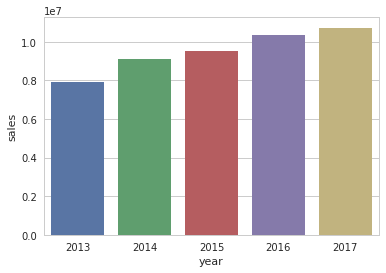

In [20]:
#graph for total sales by years
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x=sum_sales["year"], y= sum_sales["sales"], data=tips)

There is no increase in product variety compared to years. 50 different SKUs were sold each year. The increase in sales was independent of the product variety.

In [21]:
#count unique items based on years
data_train[["year", "item"]].groupby("year").nunique()

,year,item
year,,
2013,1,50
2014,1,50
2015,1,50
2016,1,50
2017,1,50


In the last 5 years, the total sales and mean of sales by months were examined. There is an increase in total sales between January and July. Overall, there is a decrease in the remaining months. When we look at the average of sales, the results are the same.

In [22]:
#Between 2013 and 2017 total sales according to month
data_train[["month", "sales"]].groupby("month", as_index=False).sum()

,month,sales
0,1,2753149.0
1,2,2776177.0
2,3,3666182.0
3,4,4136467.0
4,5,4582437.0
5,6,4726911.0
6,7,5192393.0
7,8,4580655.0
8,9,4130457.0
9,10,3967520.0


In [23]:
#Between 2013 and 2017 mean of sales according to month
month_sales= data_train[["month", "sales"]].groupby("month", as_index=False).mean(); month_sales

,month,sales
0,1,35.524503
1,2,39.378397
2,3,47.305574
3,4,55.152893
4,5,59.128219
5,6,63.025480
6,7,66.998619
7,8,59.105226
8,9,55.072760
9,10,51.193806


In [24]:
data=[]

#create scatter / trace
trace = go.Scatter(
     x = month_sales["month"],
     y = month_sales["sales"],
    mode = 'markers+lines',
    name= "Total Sales" ,
    marker = dict(
        size = 10,
        line = dict(
            width = 1,
            color = 'rgb(500, 100, 900)'
            
        )))

plot1 = [trace]
data=[trace]

#details for layout
layout = {
    'xaxis': {'title': "Months"},
    'yaxis': {'title': "Total Sales"},
     }
    
#plot
py.iplot({'data': data, "layout":layout})

I analyzed the distribution of annual sales by months. In every year, sales increased between February and July every year. We observed an increasing trend. There is a decreasing trend between July and October.

In [25]:
#find sales based on year and month
month_sales=data_train[["month", "year", "sales"]].groupby(["year","month"], as_index=False).sum(); month_sales.head()

,year,month,sales
0,2013,1,454904.0
1,2013,2,459417.0
2,2013,3,617382.0
3,2013,4,682274.0
4,2013,5,763242.0


In [ ]:
#data_train[["month", "year", "sales"]].groupby(["year","month"], as_index=False).mean().head()

In [27]:
data=[]

#create all scatter's features 
#Total sales according to years

sales_2013 = go.Scatter(
     x = np.arange(1,12),
     y = month_sales[month_sales["year"] == 2013]["sales"],
    mode = 'markers+lines',
    name=2013,
    marker = dict(
        size = 6,
        line = dict(
            width = 1,
            color = 'rgb(0, 10, 0)'
            
        )))


sales_2014 = go.Scatter(
     x = np.arange(1,12),
     y =month_sales[month_sales["year"] == 2014]["sales"],
    mode = 'markers+lines',
    name=2014,
    marker = dict(
        size = 6,
        line = dict(
            width = 1,
            color = 'rgb(45, 10, 100)'
            
        )))

sales_2015 = go.Scatter(
     x = np.arange(1,12),
     y = month_sales[month_sales["year"] == 2015]["sales"],
    mode = 'markers+lines',
    name=2015,
    marker = dict(
        size = 6,
        line = dict(
            width = 1,
            color = 'rgb(45, 10, 100)'
            
        )))


sales_2016 = go.Scatter(
     x = np.arange(1,12),
     y = month_sales[month_sales["year"] == 2016]["sales"],
    mode = 'markers+lines',
    name="2016",
    marker = dict(
        size = 6,
        line = dict(
            width = 1,
            color = 'rgb(45, 10, 100)'
            
        )))

sales_2017 = go.Scatter(
     x = np.arange(1,12),
     y = month_sales[month_sales["year"] == 2017]["sales"],
    mode = 'markers+lines',
    name= 2017,
    marker = dict(
        size = 6,
        line = dict(
            width = 1,
            color = 'rgb(45, 10, 100)'
            
        )))


plot1 = [sales_2013, sales_2014, sales_2015, sales_2016, sales_2017]
data=[sales_2013, sales_2014, sales_2015, sales_2016, sales_2017 ]




#details for layout
layout = {
    'xaxis': {'title': "Months"},
    'yaxis': {'title': "Sales"},
     }
    
#plot it
py.iplot({'data': data, "layout":layout})

Daily sales volumes in the last 5 years were calculated and visualized. When we examine the chart, sales increase in certain periods every year and decrease in certain periods. There is a pattern in sales data.

In [32]:
#find total sales according to day of year (for each years)

data_2013=data[data["year"]== 2013]
time_sales_2013=data_2013[["dayofyear", "sales"]].groupby("dayofyear", as_index=False).sum()

data_2014=data[data["year"]== 2014]
time_sales_2014=data_2014[["dayofyear", "sales"]].groupby("dayofyear", as_index=False).sum()

data_2015=data[data["year"]== 2015]
time_sales_2015=data_2015[["dayofyear", "sales"]].groupby("dayofyear", as_index=False).sum()

data_2016=data[data["year"]== 2016]
time_sales_2016=data_2016[["dayofyear", "sales"]].groupby("dayofyear", as_index=False).sum()

data_2017=data[data["year"]== 2017]
time_sales_2017=data_2017[["dayofyear", "sales"]].groupby("dayofyear", as_index=False).sum()

#create x and y column for graph

x1=time_sales_2013["dayofyear"]
y1=time_sales_2013["sales"]
y2=time_sales_2014["sales"]
y3=time_sales_2015["sales"]
y4=time_sales_2016["sales"]
y5=time_sales_2017["sales"]

In [33]:
grahp_1=[]

#create all scatter's features 
#Total sales according to day of year

sales_2013 = go.Scatter(
     x = x1,
     y = y1,
    mode = 'markers+lines',
    name=2013,
    marker = dict(
        size = 6,
        line = dict(
            width = 1,
            color = 'rgb(0, 10, 0)'
            
        )))


sales_2014 = go.Scatter(
     x = x1,
     y = y2,
    mode = 'markers+lines',
    name=2014,
    marker = dict(
        size = 6,
        line = dict(
            width = 1,
            color = 'rgb(45, 10, 100)'
            
        )))

sales_2015 = go.Scatter(
     x = x1,
     y = y3,
    mode = 'markers+lines',
    name=2015,
    marker = dict(
        size = 6,
        line = dict(
            width = 1,
            color = 'rgb(45, 10, 100)'
            
        )))


sales_2016 = go.Scatter(
     x = x1,
     y = y4,
    mode = 'markers+lines',
    name="2016",
    marker = dict(
        size = 6,
        line = dict(
            width = 1,
            color = 'rgb(45, 10, 100)'
            
        )))

sales_2017 = go.Scatter(
     x = x1,
     y = y5,
    mode = 'markers+lines',
    name= 2017,
    marker = dict(
        size = 6,
        line = dict(
            width = 1,
            color = 'rgb(45, 10, 100)'
            
        )))


plot1 = [sales_2013, sales_2014, sales_2015, sales_2016, sales_2017]
graph_1=[sales_2013, sales_2014, sales_2015, sales_2016, sales_2017 ]




#details for layout
layout = {
    'xaxis': {'title': "Days of years"},
    'yaxis': {'title': "Sales"},
     }
    
#plot it
py.iplot({'data': graph_1, "layout":layout})

Sales of the items by years were examined. The chart below shows the total sales of the first 6 items by year. In general, sales of items have been increasing over the years.

In [34]:
def plot_the_visit( style ):
    
    """
    plot for item's sales based on years
    
    Parameters:
    None
    
    Return:
    graph: Between 2013 and 2017 total sales for each item's (first 6 items)
    
    """
    #create figure
    f, axes = plt.subplots(3, 2, figsize=(13,13))
    
    #coordinates of fig
    x_axes=[0,0,1,1,2,2]
    y_axes=[0,1,0,1,0,1]
    #item numbers/id
    item=np.arange(1,10)
    
    for i in range(6):
        #calculates sales for each items
        df= data_train[data_train['item'] == item[i]][["sales","year"]].groupby("year", as_index=False).sum()
        
        x=df["year"]
        y=df["sales"]
        
        #plot
        sns.barplot(x, y, palette="Blues_d", ax =axes[x_axes[i],y_axes[i]])
        axes[x_axes[i],y_axes[i]].axhline(0, color="k", clip_on=True)
    
        #axes[x_axes[i],y_axes[i]].set(title = str(item[i]))
        
    
    #plt.suptitle(style)
    plt.show()
    
#style_list = ['classic', 'dark_background', 'ggplot', 'grayscale', 'seaborn']
#for style in style_list: with plt.style.context(style): plot_the_graph(style)

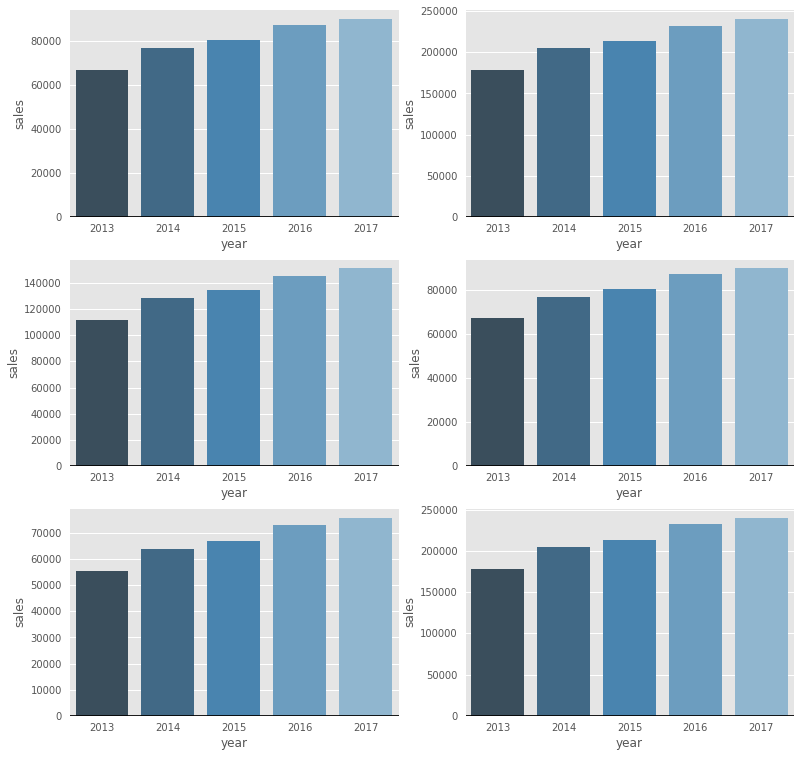

In [35]:
with plt.style.context("ggplot"):
     plot_the_visit("ggplot")

Total sales volumes of items were calculated in the last 5 years. Best selling item is 15. Top 5 items are 15,28,13,18 and 25. Least sold items are 5, 1, 41, 47 and 4. Bubble chart was created according to the total sales numbers of the items. 
The most sold items in 2016 and 2017 were 15 and 28.

In [36]:
#find sales according to items
item_sales=data_train[["item","sales"]].groupby("item", as_index=False).sum()
#proportion of each item's sales
item_sales["proportion"]=(item_sales["sales"]/ item_sales["sales"].sum())

In [37]:
item_sales.head()

,item,sales,proportion
0,1,401384.0,0.008414
1,2,1069564.0,0.022421
2,3,669087.0,0.014026
3,4,401907.0,0.008425
4,5,335230.0,0.007027


In [38]:
#order by max proportion
item_sales.sort_values(by="sales", ascending=False).head()

,item,sales,proportion
14,15,1607442.0,0.033696
27,28,1604713.0,0.033639
12,13,1539621.0,0.032274
17,18,1538876.0,0.032258
24,25,1473334.0,0.030885


In [39]:
#find sales quantity by products based on years
data_train[["year", "item", "sales"]].groupby(["year", "item"], 
                                              as_index=True).sum().sort_values(by="sales",ascending=False).head(10)

sales
year item          
2017 15    361586.0
     28    360768.0
2016 15    348760.0
     28    348160.0
2017 13    346565.0
     18    346448.0
2016 13    334430.0
     18    334141.0
2017 45    331783.0
     38    331005.0

In [40]:
#scatter graph for item_sales
ig = px.scatter(item_sales, x="item", y="sales", color="item",
                 size='item', hover_data=['item'])
fig.show()

Total sales of stores were calculated between 2013 and 2017. The number of sales of all stores has increased compared to years. Descending order by total sales;

1. Store 2
2. Store 8
3. Store 3
4. Store 10
5. Store 9



In [41]:
#find total sales accoding to store
store_sales=data_train[["sales", "store"]].groupby("store", as_index=False).sum().sort_values(by="sales", ascending=False)
store_sales

,store,sales
1,2,6120128.0
7,8,5856169.0
2,3,5435144.0
9,10,5360158.0
8,9,5025976.0
3,4,5012639.0
0,1,4315603.0
4,5,3631016.0
5,6,3627670.0
6,7,3320009.0


In [42]:
#pivot table for each store and total sales by years
pd.pivot_table(data_train, values= "sales", index= "store",
                    columns="year", aggfunc=np.sum)

year,2013,2014,2015,2016,2017
store,,,,,
1,717840.0,826786.0,861710.0,937493.0,971774.0
2,1020238.0,1171797.0,1222184.0,1329523.0,1376386.0
3,903936.0,1040520.0,1086103.0,1180619.0,1223966.0
4,835059.0,959205.0,1002730.0,1088195.0,1127450.0
5,603783.0,695599.0,725342.0,789271.0,817021.0
6,604373.0,695214.0,725917.0,786299.0,815867.0
7,552223.0,635978.0,664267.0,720382.0,747159.0
8,974655.0,1121897.0,1171046.0,1270695.0,1317876.0
9,835788.0,961779.0,1006021.0,1090831.0,1131557.0


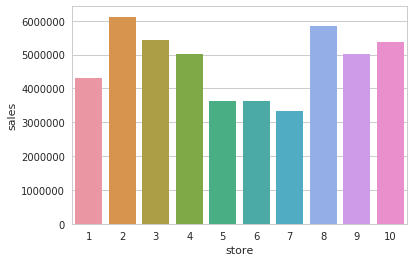

In [43]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips") 
ax = sns.barplot(x=store_sales["store"], y= store_sales["sales"], data=tips)

Histogram of the sales data was drawn. It has positively skewed distribution.

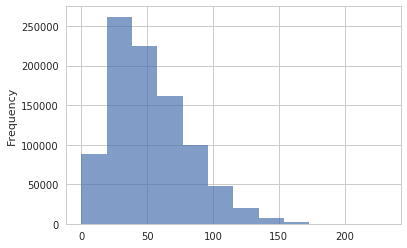

In [44]:
data_train["sales"].plot.hist(bins=12, alpha=0.7)

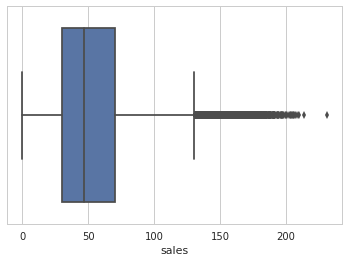

In [45]:
#outliers points for sales data
sns.boxplot(data["sales"])

# Feature Selection

In this section, we examined the relationship between variables. We created a correlation heat map. Day of week and year columns are highest correlation between sales data between 2013 and 2017. Secondly, princibal component analyze was applied. 

In [46]:
#graphed correlation heat map
def correlation(data):
    """
    Find correlation between all columns/features
    
    Parameters:
    data (dataframe): describe the data set we will look at correlation
    
    Returns:
    heatmap graph: correlation results, heatmap graph
    
    """
    
    #set figure size
    plt.figure(figsize=(12,12))
    #plot heatmap
    sns.heatmap(data.corr(),cmap='YlGnBu',annot=True,fmt = ".2f",cbar=False)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    #define tittle
    plt.title('Correlation Map')
    
    return plt.show()

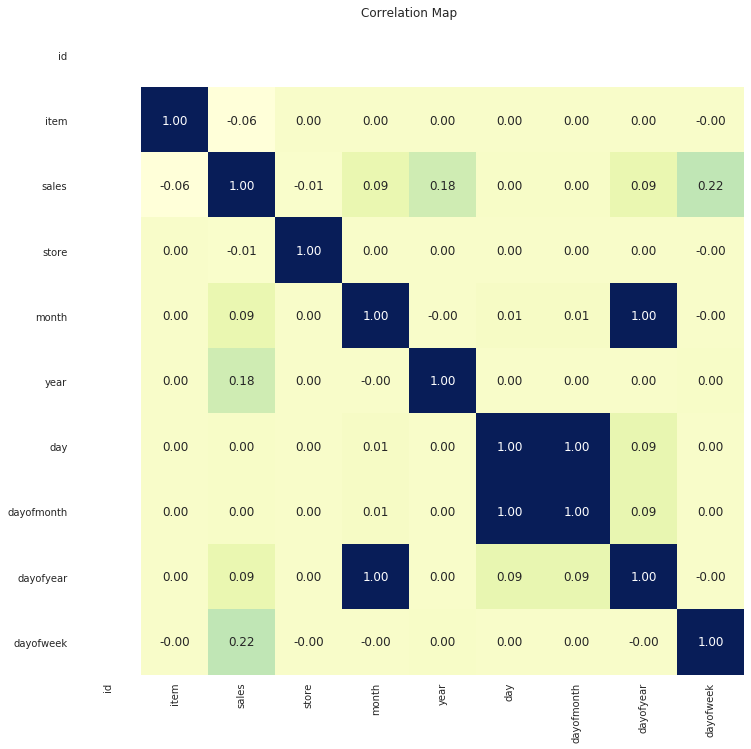

In [47]:
#find correlation heat map
correlation(data_train)

We applied Princibal Component Analyze for reduce features data set. According to result 2 number of principal components explains %98 variance. Because of that I decided 2 principal components.

In [48]:
#determine feature data set 
data_pca=data_train.drop(["date", "class", "id", "sales"], axis=1)

In [49]:
data_pca.head()

,item,store,month,year,day,dayofmonth,dayofyear,dayofweek
0,1,1,1,2013,1,1,1,1
1,1,1,1,2013,2,2,2,2
2,1,1,1,2013,3,3,3,3
3,1,1,1,2013,4,4,4,4
4,1,1,1,2013,5,5,5,5


In [50]:
# Apply PCA to the data.

from sklearn.decomposition import PCA
pca_mdl = PCA(8)
pca_mdl.fit(data_pca)
np.cumsum(pca_mdl.explained_variance_ratio_)

array([ 0.96730995,  0.98541315,  0.99876148,  0.99947866,  0.99982614,
        0.99999995,  1.        ,  1.        ])

In [51]:
# Investigate the variance accounted for by each principal component.
per=np.cumsum(pca_mdl.explained_variance_ratio_)

In [52]:
#plot for PCA
data=[]

#create trace
trace = go.Scatter(
    x = np.arange(1,8),
    y = per,
    mode = 'markers+lines',
    marker = dict(
        size = 10,
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
            
        )))

plot1 = [trace]
data=[trace]

#details for layout
layout = {
      'xaxis': {'title': 'Princibal Components'},
      'yaxis': {'title': 'Percentage of variance (information) for by each PC'},
    }
    
#plot graph
py.iplot({'data': data, "layout":layout})

In [53]:
pca_mdl = PCA(2)
pca_mdl.fit(data_pca)
pca_mdl.explained_variance_ratio_.sum()

0.98541314730396123

In [54]:
data_pca_1 = pca_mdl.fit_transform(data_pca)

# Modeling

# Random Forest Regressor

1. MODEL INFORMATION

One of the supervised learning algorithms is Random Forest. It can use for classification and regression problems. Random forest applies the general technique of bootstrap aggregating. One of main idea is trees work parallel, there is no interaction between trees. On large dataset it can run efficiently. Owing to bootstrap aggregating, model performance is better. It decreases the variance of the model and avoid increasing the bias. 


Strengths of the Random Forest is handle missing values, less impacted by noise and no require feature scaling. Weaknesses of the model more complexity and long training period. 

In the analyze, Random Forest regressor used for predict (item) sales volume according to date and store. Firstly, we used default values for Random Forest (Model 1)

Secondly, we applied Grid Search and found best parameters for model. (Model 2)Because of improve model results. Finally, we used princibal components (number of pca=2) with Model 3. 


Source:
1. https://towardsdatascience.com/random-forest-and-its-implementation-71824ced454f
2. https://en.wikipedia.org/wiki/Random_forest
3. https://onlinelibrary.wiley.com/doi/full/10.1002/stc.2170?casa_token=dktKC99HmPEAAAAA%3AxhqzGMSEopxRpudf6wtHE_4pu-3Twb_rjACkIgLLF5ZurOlnujkKVdc21i54LnnTwCGQ6JuupqcCkjeU

2. MODEL HYPERPARAMETERS

The parameters used in the algorithm were examined. Thus, the structure in the model created was examined. Some hyperparameters for Random Forest Algorithm; 


1. n_estimators= Number of trees (default=100)


2. criterion= Measure quality for split. These measures are mean squared error or mean absolute error (default=mse)


3. max_depth= Maximum depth for trees (default= None)


4. max_features= The number of features for the best split (default=auto)


  - auto= max_features=n_features

  - sqrt= max_features=sqrt(n_features)

  - log2= max_features=log2(n_features)


5. min_samples_split= The minimum number of split an internal code. (default=2)



Source:

1. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

3. METRICS

In this analyze, I used Mean Absolute Error, Mean Squared Error, Root Mean Squared Error and Mean Absolute Percentage Error for evalution metrics.


As a result of the perfect estimate, the MAPE value becomes 0, but MAPE has no upper limit. (Callegaro, 2009/2010) 
A complete picture of the error distribution is seen by calculating the RMSE value. The sensitivity of RMSE to outliers is the most common concern regarding the use of this metric. Mean Absolute Error is mean of all absolute errors. 



Source:

1. Callegaro, A.. 2009/2010, Forecastıng Methods For Spare Parts Demand. Unıversıta’ Deglı Studı Dı Padova Facolta’ Dı Ingegnerıa Dıpartımento Dı Tecnıca E Gestıone Deı Sıstemı Industrıalı Corso Dı Laurea In Ingegnerıa Gestıonale  

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr

MODEL 1

We applied Random Forest algorithm according to default parameters. Model score for training sets is 0.98. It is not right to just look at the train set and interpret the model result. The model may have memorized. It may have been overfitting. And when we checked model score for test sets, it's less than.(0.91) 


Evaluation metrics;

1. Mean Absolute Error (MAE): 6.50

2. Mean Squared Error (MSE): 71.65

3. Root Mean Squared Error (RMSE): 8.46

4. Mean Absolute Percentage Error (MAPE): 15.16


In [219]:
#determine X (features) and y (target/sales )values
X=data_train.drop(["date", "class", "id", "sales"], axis=1)
y=data_train["sales"]

In [220]:
#split to X and y values by train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [119]:
#create model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
#find score
print('Score :',model.score(X_train, y_train))

Score : 0.984935263232


In [198]:
#find score for test sets
model.score(X_test, y_test)

0.91348790741001229

In [187]:
print("Details of model: ", model)

Details of model:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)


In [183]:
# find the correlation between actual value and prediction
correlation = round(pearsonr(y_pred_test, y_test)[0],4)
correlation

0.95589999999999997

In [120]:
#find prediction results
y_pred_test = model.predict(X_test)

In [148]:
#find evaluation metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
mape = np.mean(np.abs((np.array(y_test) - np.array(y_pred_test)) / y_test)) * 100
print('Mean Absolute Percentage Error (MAPE):', mape)

Mean Absolute Error (MAE): 6.49811883899
Mean Squared Error (MSE): 71.649006517
Root Mean Squared Error (RMSE): 8.46457361696
Mean Absolute Percentage Error (MAPE): 15.1631017718


MODEL 2

In this part, grid search was applied. The best model parameters found. Models with different parameters were created. However, since the implementation of the algorithm took a long time, only two parameters were given; n_estimators and min_samples_split.

Best parameters;

1. min_samples_split = 8

2. n_estimators = 50


When we look at the model result, model score is 0.96 according to training sets. According to test datasets, model score is 0.92 and evaluation metrics;


1. Mean Absolute Error (MAE): 6.09

2. Mean Squared Error (MSE): 63.02

3. Root Mean Squared Error (RMSE): 7.94

4. Mean Absolute Percentage Error (MAPE): 14.25

In [ ]:
#create Random Forest model 
model_2 = RandomForestRegressor(random_state=42)

#create model's parameters
param_grid = { "n_estimators": [50,20,15],
            "min_samples_split" : [2,4,8],
            }
#find best model's parameters
grid = GridSearchCV(model_2, param_grid)
grid.fit(X_train, y_train)

#create best_parameters
#print(grid.best_score_)
best_param=grid.best_params_

In [199]:
print("The best parameters: ", best_param)
print("Details of model_2: ", model_2)

The best parameters:  {'min_samples_split': 8, 'n_estimators': 50}
Details of model_2:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)


In [201]:
#create model
model_2 = RandomForestRegressor(random_state=42).set_params(**best_param)
model_2.fit(X_train, y_train)
#find score for train sets
print('Score :',model_2.score(X_train, y_train))

Score : 0.967995290816


In [202]:
#find score for test sets
model_2.score(X_test, y_test)

0.92390836323428094

In [168]:
#find prediction values
y_pred_test_m2 = model_2.predict(X_test)

In [175]:
# find the correlation between actual value and prediction
correlation_m2 = round(pearsonr(y_pred_test_m2, y_test)[0],4);correlation_m2

0.96120000000000005

In [169]:
#find evaluation metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred_test_m2))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred_test_m2))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_m2)))
mape = np.mean(np.abs((np.array(y_test) - np.array(y_pred_test_m2)) / y_test)) * 100
print('Mean Absolute Percentage Error (MAPE):', mape)

Mean Absolute Error (MAE): 6.09287741222
Mean Squared Error (MSE): 63.0188221704
Root Mean Squared Error (RMSE): 7.93843952993
Mean Absolute Percentage Error (MAPE): 14.2532672593


MODEL 3

2 princibal components used as a X data set. We applied Model 2 for new X values.  Model score is 0.79 according to training sets. According to test datasets, model score is 0.73 and evaluation metrics;

1. Mean Absolute Error (MAE): 11.57
2. Mean Squared Error (MSE): 224.85
3. Root Mean Squared Error (RMSE): 14.99
4. Mean Absolute Percentage Error (MAPE): 25.92

In [209]:
#determine X (features) and y (target/sales )values
X=data_pca_1
y=data_train["sales"]

In [211]:
#split to X and y values by train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#fit the model
model_2.fit(X_train, y_train)

#find score for training set
print('Score :',model_2.score(X_train, y_train))

Score : 0.790514771826


In [212]:
#find score for training set
print("test score: ", model_2.score(X_test, y_test))

test score:  0.728511083504


In [173]:
#find prediction values
y_pred_test_m3 = model_2.predict(X_test)

In [174]:
#find evaluation metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred_test_m3))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred_test_m3))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_m3)))
mape = np.mean(np.abs((np.array(y_test) - np.array(y_pred_test_m3)) / y_test)) * 100
print('Mean Absolute Percentage Error (MAPE):', mape)

Mean Absolute Error (MAE): 11.5699341789
Mean Squared Error (MSE): 224.846152312
Root Mean Squared Error (RMSE): 14.9948708668
Mean Absolute Percentage Error (MAPE): 25.9251996351


# Conclusion

In this project, I worked on store item demand forecasting. I searched general information about inventory planning, stock management, critical role of demand planning etc. I have summarized all details. Firstly, I examined the data. I checked the missing data and data structures. I did the necessary preprocessing steps. For example, I changed the date column type.

Secondly, I discovered the data. How much sales were made annually? Which item did you sell the most? How was the daily sales quantity? What was the most selling store? I found answers to questions like this. So I analyzed the current situation. And I visualized the results. 

I checked correlation between all columns and applied principal component analysis. As a result of PCA, I decide to continue with 2 principal components. After all these steps, the modeling stage was ready.

During the modeling phase, I created 3 different models. In all these models, I used Random Forest Regressor. Model 1 work with default values for Random Forest (Model 1). Model 2 created for Grid Search and found best parameters for model. Model 3; used principal components (number of pca=2) with Model 2.

As I mention before, we used grid search to develop the model result and created Model 2. We compared model 1 and model 2. When we compare the evaluation metrics, the results of Model 2 are better than model 1. According to the test data, the model result is better in Model 2; (with very little difference)


- Model 1 score: 0.91

- Model 2 score: 0.92

The worst result was in model 3. In model 3, we used PCA as a feature set. The best result was in Model 2.

Finally, I choosed the best model; the best result was in Model 2. In the following process, the model can be developed with more inputs or different algorithms are used.

 Difficulties encountered during the project; It took quite a long time to train the data because of Random Forest complexity. I tried to change the hyper parameters of the algorithm and find the optimum result. But it took so long that I had to reduce the number of parameters I gave. This algorithm may not be the right choice if we are working in an industry where time is critical. If I had the price information of the items while looking for a solution to the problem, I would have developed a different strategy. In the business problem, we can make less risky decisions with price information.



For future improvements, decision tree regression model can be used. Training times can be compared with the models we use. Random forest is a complex model.  Another idea, we can consider the problem as a simpler time series approaches or linear regression. 